# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [54]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')  
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi.newsapi_client import NewsApiClient
from datetime import datetime, timedelta
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ironcommander\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [55]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

In [56]:
# Read your api key environment variable
load_dotenv()



True

In [57]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=os.environ["NEWS_API_KEY"])


In [58]:
current_date = pd.Timestamp(datetime.now(), tz="America/New_York").isoformat()
past_date = pd.Timestamp(datetime.now()- timedelta(30), tz="America/New_York").isoformat()

# Instantiate SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()


In [59]:
def tokenizer(text):
    """Tokenizes text."""
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    # Create a tokenized list of the words
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    # Convert the words to lowercase & Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    return tokens


In [60]:
# Use newsapi client to get most relevant 20 headlines per day in the past month
# also calculates the vader of each article 

def get_headlines(keyword):
    all_content=[]
    all_description=[]
    all_headlines=[]
    all_dates = []    
    headlines = []
    content = []
    description = [] 
    title_sent=[]
    content_sent=[]
    descript_sent=[]
    all_title_sent=[]
    all_content_sent=[]
    all_descript_sent=[]
    title_tokens=[]
    content_tokens=[]
    descript_tokens=[]
    date = datetime.strptime(current_date[:10], "%Y-%m-%d")
    end_date = datetime.strptime(past_date[:10], "%Y-%m-%d")
    print(f"Fetching news about '{keyword}'")
    print("*" * 30)
    while date > end_date:
        print(f"retrieving news from: {date}")
        articles = newsapi.get_everything(
            q=keyword,
            from_param=str(date)[:10],
            to=str(date)[:10],
            language="en",
            sort_by="relevancy",
            page=1,
        )

        for i in range(0, len(articles["articles"])):
            headlines.append(articles["articles"][i]["title"])
            content.append(articles["articles"][i]["content"])
            description.append(articles["articles"][i]["description"])
        #vader sentiments
        #for headlines
            try:
                
                #title vader sentiments
                text = articles["articles"][i]["title"]
                sentiment = analyzer.polarity_scores(text)
                compound = sentiment["compound"]
                pos = sentiment["pos"]
                neu = sentiment["neu"]
                neg = sentiment["neg"]
        
                title_sent.append({
                    "text_title": text,
                    "date": date,
                    "compound_title": compound,
                    "positive_title": pos,
                    "negative_title": neg,
                    "neutral_title": neu,
                    "title_tokens":tokenizer(text)
                })
                all_title_sent.append(title_sent)


 #content vader sentiments
                text = articles["articles"][i]["content"]
                sentiment = analyzer.polarity_scores(text)
                compound = sentiment["compound"]
                pos = sentiment["pos"]
                neu = sentiment["neu"]
                neg = sentiment["neg"]
        
                content_sent.append({
                    "text_content": text,
                    
                    "compound_cont": compound,
                    "positive_cont": pos,
                    "negative_cont": neg,
                    "neutral_cont": neu,
                    "content_tokens":tokenizer(text)
                })
                all_content_sent.append(content.sent)

 #description vader sentiments
                text = articles["articles"][i]["description"]
                
                sentiment = analyzer.polarity_scores(text)
                compound = sentiment["compound"]
                pos = sentiment["pos"]
                neu = sentiment["neu"]
                neg = sentiment["neg"]
        
                descript_sent.append({
                    "text_descript": text,

                    "compound_descript": compound,
                    "positive_descript": pos,
                    "negative_descript": neg,
                    "neutral_descript": neu,
                    "descript_tokens":tokenizer(text)
                })
                all_descript_sent.append(descript_sent)


            
            except AttributeError:
                pass
    

        all_headlines.append(headlines)
        all_content.append(content)
        all_description.append(description)
        all_dates.append(date)
        date = date - timedelta(days=1)

         
       # Create DataFrame
    content_sentiment_df = pd.DataFrame(all_content_sent)
    title_sentiment_df = pd.DataFrame(all_title_sent)
    descript_sentiment_df = pd.DataFrame(all_descript_sent)
    final_df = title_sentiment_df.join(content_sentiment_df).join(descript_sentiment_df)
     # Reorder DataFrame columns
    cols = ["date", "text", "compound", "positive", "negative", "neutral"]
    final_df = final_df[cols]
    



    return all_headlines, all_dates, final_df
    

In [61]:
# Fetch the Bitcoin news articles
btc_headlines, btc_dates, btc_sentiments = get_headlines("bitcoin")

Fetching news about 'bitcoin'
******************************
retrieving news from: 2022-02-13 00:00:00
retrieving news from: 2022-02-12 00:00:00
retrieving news from: 2022-02-11 00:00:00
retrieving news from: 2022-02-10 00:00:00
retrieving news from: 2022-02-09 00:00:00
retrieving news from: 2022-02-08 00:00:00
retrieving news from: 2022-02-07 00:00:00
retrieving news from: 2022-02-06 00:00:00
retrieving news from: 2022-02-05 00:00:00
retrieving news from: 2022-02-04 00:00:00
retrieving news from: 2022-02-03 00:00:00
retrieving news from: 2022-02-02 00:00:00
retrieving news from: 2022-02-01 00:00:00
retrieving news from: 2022-01-31 00:00:00
retrieving news from: 2022-01-30 00:00:00
retrieving news from: 2022-01-29 00:00:00
retrieving news from: 2022-01-28 00:00:00
retrieving news from: 2022-01-27 00:00:00
retrieving news from: 2022-01-26 00:00:00
retrieving news from: 2022-01-25 00:00:00
retrieving news from: 2022-01-24 00:00:00
retrieving news from: 2022-01-23 00:00:00
retrieving news

In [66]:
btc_sentiments.tail()

,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
595,{'text_title': 'Inside Heather Morgan and Ilya...,{'text_title': 'How Two 23 Year-Old Texans Mad...,{'text_title': 'Does a $3.6B Bitcoin Seizure P...,{'text_title': 'More Than Half of Bitcoin Inve...,{'text_title': 'Divorcing Couples Fight Over t...,{'text_title': 'Drake Goes Big for Super Bowl ...,{'text_title': '‘Financial Catastrophe’—A Lege...,{'text_title': 'CryptoPunk #5822 Sold for Reco...,{'text_title': 'Drake Bets Big on the Super Bo...,"{'text_title': 'If You Can't Trust Bitcoin, Wh...",...,{'text_title': '‘Astonishing’—An Investment Gi...,{'text_title': 'This Breakout Growth Stock Out...,{'text_title': 'Explained Live: ‘Bitcoin is as...,"{'text_title': '‘Trading is gambling, no doubt...",{'text_title': 'It’s not still the early days ...,{'text_title': 'Bitcoin Price Outlook: Goldman...,{'text_title': 'Ransomware Group REvil Dismant...,{'text_title': 'Bitcoin Hunter Begins the Free...,{'text_title': 'The race to fund crypto’s futu...,{'text_title': 'Why GameFi Is Crypto's Hot New...
596,{'text_title': 'Inside Heather Morgan and Ilya...,{'text_title': 'How Two 23 Year-Old Texans Mad...,{'text_title': 'Does a $3.6B Bitcoin Seizure P...,{'text_title': 'More Than Half of Bitcoin Inve...,{'text_title': 'Divorcing Couples Fight Over t...,{'text_title': 'Drake Goes Big for Super Bowl ...,{'text_title': '‘Financial Catastrophe’—A Lege...,{'text_title': 'CryptoPunk #5822 Sold for Reco...,{'text_title': 'Drake Bets Big on the Super Bo...,"{'text_title': 'If You Can't Trust Bitcoin, Wh...",...,{'text_title': '‘Astonishing’—An Investment Gi...,{'text_title': 'This Breakout Growth Stock Out...,{'text_title': 'Explained Live: ‘Bitcoin is as...,"{'text_title': '‘Trading is gambling, no doubt...",{'text_title': 'It’s not still the early days ...,{'text_title': 'Bitcoin Price Outlook: Goldman...,{'text_title': 'Ransomware Group REvil Dismant...,{'text_title': 'Bitcoin Hunter Begins the Free...,{'text_title': 'The race to fund crypto’s futu...,{'text_title': 'Why GameFi Is Crypto's Hot New...
597,{'text_title': 'Inside Heather Morgan and Ilya...,{'text_title': 'How Two 23 Year-Old Texans Mad...,{'text_title': 'Does a $3.6B Bitcoin Seizure P...,{'text_title': 'More Than Half of Bitcoin Inve...,{'text_title': 'Divorcing Couples Fight Over t...,{'text_title': 'Drake Goes Big for Super Bowl ...,{'text_title': '‘Financial Catastrophe’—A Lege...,{'text_title': 'CryptoPunk #5822 Sold for Reco...,{'text_title': 'Drake Bets Big on the Super Bo...,"{'text_title': 'If You Can't Trust Bitcoin, Wh...",...,{'text_title': '‘Astonishing’—An Investment Gi...,{'text_title': 'This Breakout Growth Stock Out...,{'text_title': 'Explained Live: ‘Bitcoin is as...,"{'text_title': '‘Trading is gambling, no doubt...",{'text_title': 'It’s not still the early days ...,{'text_title': 'Bitcoin Price Outlook: Goldman...,{'text_title': 'Ransomware Group REvil Dismant...,{'text_title': 'Bitcoin Hunter Begins the Free...,{'text_title': 'The race to fund crypto’s futu...,{'text_title': 'Why GameFi Is Crypto's Hot New...
598,{'text_title': 'Inside Heather Morgan and Ilya...,{'text_title': 'How Two 23 Year-Old Texans Mad...,{'text_title': 'Does a $3.6B Bitcoin Seizure P...,{'text_title': 'More Than Half of Bitcoin Inve...,{'text_title': 'Divorcing Couples Fight Over t...,{'text_title': 'Drake Goes Big for Super Bowl ...,{'text_title': '‘Financial Catastrophe’—A Lege...,{'text_title': 'CryptoPunk #5822 Sold for Reco...,{'text_title': 'Drake Bets Big on the Super Bo...,"{'text_title': 'If You Can't Trust Bitcoin, Wh...",...,{'text_title': '‘Astonishing’—An Investment Gi...,{'text_title': 'This Breakout Growth Stock Out...,{'text_title': 'Explained Live: ‘Bitcoin is as...,"{'text_title': '‘Trading is gambling, no doubt...",{'text_title': 'It’s not still the early days ...,{'text_title': 'Bitcoin Price Outlook: Goldman...,{'text_title': 'Ransomware Group REvil Dismant...,{'text_title': 'Bitcoin Hunter Begins

In [63]:
# Fetch the Ethereum news articles
eth_headlines, eth_dates, eth_sentiments = get_headlines("ethereum")

Fetching news about 'ethereum'
******************************
retrieving news from: 2022-02-13 00:00:00
retrieving news from: 2022-02-12 00:00:00
retrieving news from: 2022-02-11 00:00:00
retrieving news from: 2022-02-10 00:00:00
retrieving news from: 2022-02-09 00:00:00
retrieving news from: 2022-02-08 00:00:00
retrieving news from: 2022-02-07 00:00:00
retrieving news from: 2022-02-06 00:00:00
retrieving news from: 2022-02-05 00:00:00
retrieving news from: 2022-02-04 00:00:00
retrieving news from: 2022-02-03 00:00:00


NewsAPIException: {'status': 'error', 'code': 'rateLimited', 'message': 'You have made too many requests recently. Developer accounts are limited to 100 requests over a 24 hour period (50 requests available every 12 hours). Please upgrade to a paid plan if you need more requests.'}

In [ ]:
btc_headlines[0][19]

'You’re Not Imagining It, Markets Really Are Thinner Now'

In [ ]:
len(btc_headlines[20])

20

In [ ]:
# Describe the Bitcoin Sentiment
btc_sentiments.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
unique,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,{'text_title': '“You Don't Own Web3”: A Coinba...,{'text_title': 'The race to power the DeFi eco...,{'text_title': 'Will blockchain fulfil its dem...,{'text_title': 'Rio de Janeiro Is Set to Alloc...,{'text_title': 'Bitcoin Miners: A Study in Vol...,{'text_title': 'India to soon get Exchange-Tra...,{'text_title': 'PayPal Is Exploring Crypto and...,{'text_title': 'Which Money-Making Strategy Is...,"{'text_title': 'Bitcoin, Ethereum, Cardano Con...",{'text_title': 'Crypto Enthusiasts Meet Their ...,{'text_title': '‘Astonishing’—An Investment Gi...,{'text_title': 'This Breakout Growth Stock Out...,{'text_title': 'Explained Live: ‘Bitcoin is as...,"{'text_title': '‘Trading is gambling, no doubt...",{'text_title': 'It’s not still the early days ...,{'text_title': 'Bitcoin Price Outlook: Goldman...,{'text_title': 'Ransomware Group REvil Dismant...,{'text_title': 'Bitcoin Hunter Begins the Free...,{'text_title': 'The race to fund crypto’s futu...,{'text_title': 'Why GameFi Is Crypto's Hot New...
freq,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20


In [ ]:
# Describe the Ethereum Sentiment
eth_sentiments.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
unique,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,{'text_title': 'The race to power the DeFi eco...,{'text_title': '“You Don't Own Web3”: A Coinba...,"{'text_title': 'Bitcoin, Ethereum, Cardano Con...",{'text_title': 'Which Money-Making Strategy Is...,{'text_title': 'India to soon get Exchange-Tra...,{'text_title': 'Ethereum and This Top Value St...,{'text_title': 'OpenSea Faces Sudden Disruptio...,{'text_title': 'It’s not still the early days ...,{'text_title': 'PayPal Is Exploring Crypto and...,"{'text_title': 'Konami earned over £118,000 fr...",{'text_title': 'Cryptocurrency Prices Today Ja...,{'text_title': 'Why Aave's Cryptocurrency Is S...,{'text_title': 'The race to fund crypto’s futu...,{'text_title': 'Bitcoin Miners: A Study in Vol...,{'text_title': 'Cryptocurrency-related job pos...,"{'text_title': 'NFTs, DAOs, MobileWeb3, And Th...",{'text_title': '‘Astonishing’—An Investment Gi...,{'text_title': 'Explained Live: ‘Bitcoin is as...,{'text_title': 'Jack Dorsey-Led Payments Compa...,{'text_title': 'Landry Shamet with an and one ...
freq,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [ ]:
btc_tokens=[]
for i in range(0,len(btc_headlines)):
    for j in range(0,len(btc_headlines[i])):
        btc_tokens=btc_tokens+tokenizer(btc_headlines[i][j])
        
print(btc_tokens)

['took', 'days', 'netflix', 'order', 'docuseries', 'bonnie', 'clyde', 'crypto', 'world', 'bitcoin', 'paradise', 'briton', 'creates', 'crypto', 'utopia', 'south', 'pacific', 'cia', 'secretly', 'run', 'bulk', 'collection', 'program', 'youtube', 'exploring', 'web', 'onlyfans', 'debuts', 'nft', 'profile', 'pictures', 'weeks', 'business', 'crypto', 'roundup', 'obj', 'hope', 'come', 'rams', 'drake', 'uber', 'ceo', 'says', 'app', 'absolutely', 'accept', 'crypto', 'payment', 'future', 'galaxy', 'ha', 'builtin', 'cryptocurrency', 'wallet', 'bitcoin', 'v', 'sp', 'better', 'first', 'investment', 'crypto', 'suddenly', 'braced', 'huge', 'trillion', 'earthquake', 'extreme', 'volatility', 'hits', 'price', 'bitcoin', 'ethereum', 'bnb', 'solana', 'cardano', 'xrp', 'ui', 'business', 'alum', 'donates', 'bitcoin', 'fund', 'blockchain', 'education', 'champaignurbana', 'newsgazette', 'crypto', 'recovering', 'time', 'invest', 'bitcoin', 'hodler', 'accumulation', 'increasing', 'nationstate', 'bitcoin', 'strat

In [ ]:
# Create a new tokens column for Bitcoin


AttributeError: 'set' object has no attribute 'append'

In [ ]:
# Create a new tokens column for Ethereum
eth_tokens=[]
for i in range(0,len(eth_headlines)):
    for j in range(0,len(eth_headlines[i])):
        eth_tokens=eth_tokens+tokenizer(eth_headlines[i][j])
        
print(eth_tokens)

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_28000/39349498.py, line 2)

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [ ]:
from collections import Counter
from nltk import ngrams


In [ ]:
word_counts=Counter(btc_tokens)
print(dict(word_counts))

{'took': 2, 'days': 1, 'netflix': 5, 'order': 1, 'docuseries': 2, 'bonnie': 2, 'clyde': 2, 'crypto': 142, 'world': 6, 'bitcoin': 261, 'paradise': 3, 'briton': 1, 'creates': 2, 'utopia': 2, 'south': 1, 'pacific': 1, 'cia': 1, 'secretly': 1, 'run': 1, 'bulk': 1, 'collection': 2, 'program': 1, 'youtube': 2, 'exploring': 2, 'web': 6, 'onlyfans': 1, 'debuts': 1, 'nft': 12, 'profile': 5, 'pictures': 2, 'weeks': 3, 'business': 19, 'roundup': 4, 'obj': 1, 'hope': 2, 'come': 2, 'rams': 1, 'drake': 2, 'uber': 1, 'ceo': 5, 'says': 8, 'app': 2, 'absolutely': 2, 'accept': 5, 'payment': 9, 'future': 11, 'galaxy': 1, 'ha': 3, 'builtin': 1, 'cryptocurrency': 49, 'wallet': 7, 'v': 5, 'sp': 1, 'better': 8, 'first': 14, 'investment': 7, 'suddenly': 4, 'braced': 2, 'huge': 4, 'trillion': 4, 'earthquake': 1, 'extreme': 3, 'volatility': 4, 'hits': 2, 'price': 22, 'ethereum': 30, 'bnb': 5, 'solana': 9, 'cardano': 9, 'xrp': 4, 'ui': 1, 'alum': 1, 'donates': 1, 'fund': 6, 'blockchain': 17, 'education': 1, 'cha

In [ ]:
def bigram_counter(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    
    bigrams = ngrams(corpus, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])

# Generate the Bitcoin N-grams where N=2
#bigram_counts = Counter(ngrams(btc_tokens, n=2))
#print(dict(bigram_counts))
bigram_counter(btc_tokens)

,bigram,count
0,"(bitcoin, ethereum)",24
1,"(el, salvador)",20
2,"(bitcoin, mining)",12
3,"(us, stock)",8
4,"(crypto, bitcoin)",7
5,"(reuters, bitcoin)",7
6,"(legal, tender)",7
7,"(bitcoin, price)",6
8,"(stolen, bitcoin)",6
9,"(reuters, crypto)",6


In [ ]:
# Generate the Ethereum N-grams where N=2
bigram_counter(eth_tokens)

In [ ]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [ ]:
# Use token_count to get the top 10 words for Bitcoin
token_count(btc_tokens,10)

[('bitcoin', 261),
 ('crypto', 142),
 ('reuters', 65),
 ('cryptocurrency', 49),
 ('market', 32),
 ('stock', 32),
 ('ethereum', 30),
 ('us', 28),
 ('say', 27),
 ('el', 25)]

In [ ]:
# Use token_count to get the top 10 words for Ethereum
token_count(eth_tokens)

NameError: name 'eth_tokens' is not defined

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]


NameError: name 'spacy' is not defined

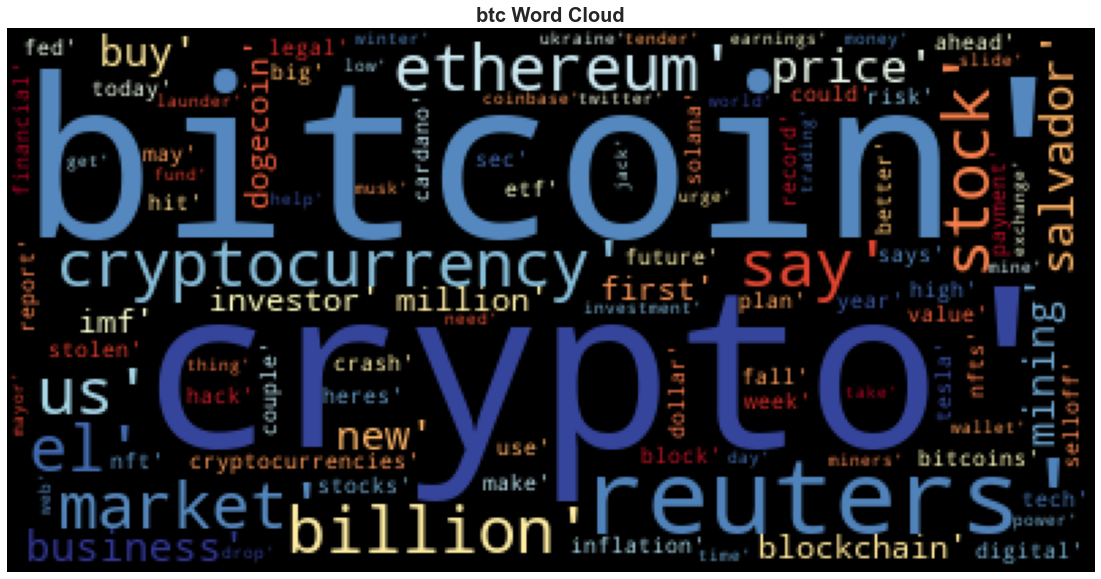

In [ ]:
# Generate the Bitcoin word cloud
terms_list = str(token_count(btc_tokens,100))
# Create the word cloud
wordcloud = WordCloud(colormap="RdYlBu").generate(terms_list)
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 20, "fontweight": "bold"}
plt.title("btc Word Cloud", fontdict=fontdict)
plt.show()

In [ ]:
# Generate the Ethereum word cloud
terms_list = str(token_count(eth_tokens,50))
# Create the word cloud
wordcloud = WordCloud(colormap="RdYlBu").generate(terms_list)
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 20, "fontweight": "bold"}
plt.title("btc Word Cloud", fontdict=fontdict)
plt.show()

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [ ]:
import spacy
from spacy import displacy

In [ ]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [ ]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [ ]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
btc_tokens.type()

AttributeError: 'list' object has no attribute 'type'

In [ ]:
# Run the NER processor on all of the text
doc=nlp(btc_tokens)

# Add a title to the document
# YOUR CODE HERE!

ValueError: [E866] Expected a string or 'Doc' as input, but got: <class 'list'>.

In [ ]:
# Render the visualization
# YOUR CODE HERE!

In [ ]:
# List all Entities
# YOUR CODE HERE!

---

### Ethereum NER

In [ ]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!

In [ ]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [ ]:
# Render the visualization
# YOUR CODE HERE!

In [ ]:
# List all Entities
# YOUR CODE HERE!

---